# COPY RIGHT ''' AMIR MOHAMMAD ROUHANI'''

## CLUSTRING PROJECT FOR SPECIFIC TOPICS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN,SpectralBiclustering,KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor

#  loading part

In [2]:
df = pd.read_excel('Results_Azar.xlsx') 

In [3]:
df

,Name,Gender,City,Month,Day,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,User 1,0,300,8,2,3,2,1,4,5,...,10,50,50,80,60,5,5,25,7,80
1,User 2,0,600,8,17,1,3,2,4,5,...,80,60,60,60,40,10,10,75,40,70
2,User 3,1,1125,1,23,4,5,1,2,3,...,0,0,0,50,50,75,10,25,75,90
3,User 4,1,300,8,29,2,3,4,5,1,...,0,20,100,0,10,0,0,10,80,30
4,User 5,0,300,9,16,1,2,3,5,4,...,20,60,60,60,60,90,60,10,60,70
5,User 6,0,300,9,16,3,2,1,5,4,...,40,10,20,20,10,35,35,0,70,0
6,User 7,0,430,11,2,3,4,2,1,5,...,40,60,60,70,70,50,40,70,70,60
7,User 8,0,300,6,8,1,2,3,4,5,...,20,30,0,30,50,0,0,0,60,60
8,User 9,0,300,8,5,1,5,4,3,2,...,20,0,80,60,60,30,30,5,5,80
9,User 10,1,300,1,24,1,3,4,5,2,...,20,50,70,20,20,50,0,100,50,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 145 entries, Name to Q60
dtypes: int64(144), object(1)
memory usage: 34.1+ KB


In [5]:
df.describe()

,Gender,City,Month,Day,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,Q2-a,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.500000,604.333333,7.033333,15.633333,3.133333,3.033333,2.400000,2.933333,3.500000,3.133333,...,19.766667,32.166667,55.133333,32.866667,24.866667,20.266667,10.200000,48.900000,69.000000,45.500000
std,0.508548,463.944359,3.221515,8.417893,1.569831,1.217214,1.452703,1.387961,1.306483,1.306043,...,23.255231,23.877682,33.551539,32.763240,23.051267,26.386953,15.550585,37.075273,24.221677,28.325388
min,0.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,300.000000,5.000000,8.500000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,...,0.000000,10.000000,21.250000,5.000000,10.000000,0.000000,0.000000,10.000000,60.000000,22.500000
50%,0.500000,300.000000,8.000000,16.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,...,10.000000,35.000000,60.000000,20.000000,15.000000,9.000000,2.500000,47.500000,75.000000,50.000000
75%,1.000000,875.000000,9.000000,22.750000,5.000000,4.000000,3.750000,4.000000,4.750000,4.000000,...,30.000000,50.000000,80.000000,60.000000,47.500000,28.750000,10.000000,80.000000,80.000000,70.000000
max,1.000000,1700.000000,12.000000,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,86.000000,65.000000,100.000000,99.000000,70.000000,90.000000,60.000000,100.000000,100.000000,90.000000


# preproccessing part 1

In [6]:
main_data_frame = df.drop(columns = ['Name','Gender','City','Day','Month'])

In [7]:
main_data_frame

,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,Q2-a,Q2-b,Q2-c,Q2-d,Q2-e,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,3,2,1,4,5,5,4,1,3,2,...,10,50,50,80,60,5,5,25,7,80
1,1,3,2,4,5,5,4,2,1,3,...,80,60,60,60,40,10,10,75,40,70
2,4,5,1,2,3,4,2,3,1,5,...,0,0,0,50,50,75,10,25,75,90
3,2,3,4,5,1,4,1,2,5,3,...,0,20,100,0,10,0,0,10,80,30
4,1,2,3,5,4,5,1,3,2,4,...,20,60,60,60,60,90,60,10,60,70
5,3,2,1,5,4,3,4,1,2,5,...,40,10,20,20,10,35,35,0,70,0
6,3,4,2,1,5,3,2,4,1,5,...,40,60,60,70,70,50,40,70,70,60
7,1,2,3,4,5,1,2,3,4,5,...,20,30,0,30,50,0,0,0,60,60
8,1,5,4,3,2,3,2,5,1,4,...,20,0,80,60,60,30,30,5,5,80
9,1,3,4,5,2,4,3,2,1,5,...,20,50,70,20,20,50,0,100,50,50


In [8]:
scaler = MinMaxScaler()
main_data_frame = pd.DataFrame(scaler.fit_transform(main_data_frame),columns = main_data_frame.columns.values)

In [9]:
main_data_frame

,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,Q2-a,Q2-b,Q2-c,Q2-d,Q2-e,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,0.50,0.25,0.00,0.75,1.00,1.00,0.75,0.00,0.50,0.000000,...,0.116279,0.769231,0.50,0.808081,0.857143,0.055556,0.083333,0.25,0.021053,0.888889
1,0.00,0.50,0.25,0.75,1.00,1.00,0.75,0.25,0.00,0.333333,...,0.930233,0.923077,0.60,0.606061,0.571429,0.111111,0.166667,0.75,0.368421,0.777778
2,0.75,1.00,0.00,0.25,0.50,0.75,0.25,0.50,0.00,1.000000,...,0.000000,0.000000,0.00,0.505051,0.714286,0.833333,0.166667,0.25,0.736842,1.000000
3,0.25,0.50,0.75,1.00,0.00,0.75,0.00,0.25,1.00,0.333333,...,0.000000,0.307692,1.00,0.000000,0.142857,0.000000,0.000000,0.10,0.789474,0.333333
4,0.00,0.25,0.50,1.00,0.75,1.00,0.00,0.50,0.25,0.666667,...,0.232558,0.923077,0.60,0.606061,0.857143,1.000000,1.000000,0.10,0.578947,0.777778
5,0.50,0.25,0.00,1.00,0.75,0.50,0.75,0.00,0.25,1.000000,...,0.465116,0.153846,0.20,0.202020,0.142857,0.388889,0.583333,0.00,0.684211,0.000000
6,0.50,0.75,0.25,0.00,1.00,0.50,0.25,0.75,0.00,1.000000,...,0.465116,0.923077,0.60,0.707071,1.000000,0.555556,0.666667,0.70,0.684211,0.666667
7,0.00,0.25,0.50,0.75,1.00,0.00,0.25,0.50,0.75,1.000000,...,0.232558,0.461538,0.00,0.303030,0.714286,0.000000,0.000000,0.00,0.578947,0.666667
8,0.00,1.00,0.75,0.50,0.25,0.50,0.25,1.00,0.00,0.666667,...,0.232558,0.000000,0.80,0.606061,0.857143,0.333333,0.500000,0.05,0.000000,0.888889
9,0.00,0.50,0.75,1.00,0.25,0.75,0.50,0.25,0.00,1.000000,...,0.232558,0.769231,0.70,0.202020,0.285714,0.555556,0.000000,1.00,0.473684,0.555556


# clustering checking mode

### check for out lier data

In [10]:
lof = LocalOutlierFactor(n_neighbors=5, contamination="auto", n_jobs=1)

In [11]:
y_pred = lof.fit_predict(main_data_frame)

In [12]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
np.unique(y_pred, return_counts=True)
print('this means we dont have out lier data')

this means we dont have out lier data


### DB Scan clustring checking

In [15]:
db_group = []
for i in np.arange(0.01,1,0.01):
    dbscan = DBSCAN(eps=i, min_samples=2)
    dbscan.fit(main_data_frame)
    if dbscan.labels_[0] != -1:
        db_group.append(np.unique(dbscan.labels_))
if len(db_group) == 0:
    db_group.append('this is empty')


In [16]:
db_group

['this is empty']

In [17]:
for i in range(1,350,1):
    dbscan = DBSCAN(eps=i, min_samples=2)
    dbscan.fit(main_data_frame)
    if dbscan.labels_[0] != -1:
        db_group.append(np.unique(dbscan.labels_))
if len(db_group) == 0:
    db_group.append('this is empty')

In [18]:
db_group

['this is empty',
 array([-1,  0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dty

### Kmeans clustring checking

In [19]:
kmean_group = []
kmean_group_wcss = {}
for i in range(2,31):
    kmean = KMeans(n_clusters=i,init='k-means++',max_iter=1000 )
    kmean.fit(main_data_frame)
    labels = kmean.labels_
    if labels[0] != -1:
        kmean_group.append(labels)
        kmean_group_wcss[i] = kmean.inertia_
if len(kmean_group) == 0:
    db_group.append('this is empty')

In [20]:
kmean_group

[array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1]),
 array([2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0,
        2, 0, 0, 2, 0, 2, 1, 2]),
 array([3, 1, 3, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1,
        1, 1, 1, 0, 3, 3, 2, 1]),
 array([4, 3, 0, 1, 0, 0, 0, 2, 3, 0, 2, 2, 0, 1, 3, 4, 4, 3, 0, 4, 0, 0,
        2, 0, 3, 2, 3, 0, 1, 3]),
 array([4, 3, 4, 0, 5, 1, 3, 2, 1, 3, 2, 5, 1, 0, 1, 4, 3, 1, 1, 4, 1, 1,
        1, 1, 3, 2, 4, 4, 0, 1]),
 array([5, 6, 5, 2, 1, 6, 1, 1, 1, 3, 0, 4, 3, 2, 6, 5, 6, 0, 3, 5, 3, 3,
        3, 3, 6, 3, 5, 3, 2, 0]),
 array([2, 6, 0, 4, 3, 6, 1, 7, 1, 5, 7, 3, 5, 4, 6, 2, 6, 6, 5, 2, 1, 5,
        5, 1, 6, 5, 1, 0, 4, 6]),
 array([3, 1, 0, 2, 5, 1, 6, 4, 6, 1, 4, 5, 0, 2, 1, 3, 1, 1, 0, 3, 6, 0,
        4, 0, 1, 4, 7, 8, 2, 1]),
 array([3, 1, 3, 6, 4, 0, 7, 8, 7, 2, 8, 9, 2, 6, 1, 3, 5, 1, 5, 3, 5, 5,
        2, 5, 5, 2, 3, 5, 6, 1]),
 array([ 2,  1,  2,  3,  8, 

<AxesSubplot:>

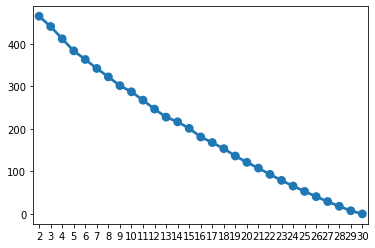

In [21]:
sns.pointplot(x = list(kmean_group_wcss.keys()), y = list(kmean_group_wcss.values()))

# preproccessing part 2

In [22]:
main_data_frame = df.drop(columns = ['Name'])

In [23]:
db_group = []
db_group_label = []
for i in range(1,300,1):
    dbscan = DBSCAN(eps=i, min_samples=2)
    dbscan.fit(df.drop(columns = ['Name']))
    labels = dbscan.labels_
    if dbscan.labels_[0] != -1:
        db_group_label.append(np.unique(labels))
        db_group.append(dbscan.labels_)
        print(silhouette_score(main_data_frame, labels))
if len(db_group) == 0:
    db_group.append('this is empty')

-0.0358053748703744
-0.022453023592416542
-0.022453023592416542
0.009027054666859472
0.009027054666859472
0.009027054666859472
0.009027054666859472
0.0310542618488382
0.0310542618488382
0.0310542618488382
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3402632018015352
0.3902483401748691
0.3902483401748691
0.3902483401748691
0.3902483401748691
0.3902483401748691
0.428333780635791
0.428333780635791
0.48419957625331816
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.5301659242778646
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.570162786552484
0.57016278

In [24]:
print(len(db_group_label))
db_group_label

162


[array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([-1,  0,  1,  2,  3], dtype=int64),
 array([-1,  0,  1,  2,  3], dtype=int64),
 array([-1,  0,  1,  2,  3], dtype=int64),
 array([-1,  0,  1,  2,  3], dtype=int64),
 array([-1,  0,  1,  2,  3], dtype=int64),
 array([-1,  0,  1,  2,  3], dtype=int64),
 array([-1,  0,  1,  2,  3], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1, 

### Spectral Bi clustering checking

In [25]:
spec_group = []
for i in range(2,9):
    sc = SpectralBiclustering(n_clusters=i)
    sc.fit(main_data_frame)
    labels = sc.row_labels_
    if labels[0] != -1:
        spec_group.append(labels)
        print(silhouette_score(main_data_frame, labels))
if len(spec_group) == 0:
    db_group.append('this is empty')

0.6751572986875625
0.6233351825858494
0.14365602729918925
0.14454818578326875
0.10702003077396474
0.11778934867173449
0.08796904781721936


In [26]:
spec_group

[array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1]),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2,
        0, 0, 1, 1, 1, 0, 1, 0]),
 array([3, 0, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 1, 3, 0, 2, 0, 0, 1, 2,
        1, 1, 0, 0, 0, 1, 0, 1]),
 array([0, 3, 2, 4, 3, 4, 3, 0, 3, 0, 0, 0, 0, 4, 2, 3, 0, 1, 0, 0, 2, 1,
        1, 2, 0, 4, 0, 2, 4, 2]),
 array([1, 2, 0, 5, 2, 3, 2, 5, 2, 1, 1, 1, 5, 5, 3, 1, 5, 4, 1, 1, 0, 4,
        0, 3, 5, 5, 5, 3, 5, 0]),
 array([1, 2, 0, 5, 2, 6, 2, 1, 2, 6, 1, 6, 6, 5, 4, 1, 1, 3, 6, 1, 0, 3,
        0, 4, 1, 5, 1, 4, 5, 0]),
 array([5, 0, 7, 6, 4, 0, 4, 5, 4, 6, 5, 4, 6, 0, 3, 5, 6, 2, 0, 5, 1, 2,
        1, 3, 6, 6, 6, 3, 0, 1])]

# clustring apply mode :


## Kmeans is ready
## DBScan is ready
## Spectral Bi is ready

In [27]:
main_data_frame = df
main_data_frame['index'] = range(1,31)
main_data_frame['Kmeans'] = kmean_group[6]
main_data_frame['DBScan'] = db_group[0]
main_data_frame['Spectral_Bi'] = spec_group[6]

In [29]:
main_data_frame

,Name,Gender,City,Month,Day,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,...,Q55,Q56,Q57,Q58,Q59,Q60,index,Kmeans,DBScan,Spectral_Bi
0,User 1,0,300,8,2,3,2,1,4,5,...,60,5,5,25,7,80,1,2,0,5
1,User 2,0,600,8,17,1,3,2,4,5,...,40,10,10,75,40,70,2,6,-1,0
2,User 3,1,1125,1,23,4,5,1,2,3,...,50,75,10,25,75,90,3,0,-1,7
3,User 4,1,300,8,29,2,3,4,5,1,...,10,0,0,10,80,30,4,4,1,6
4,User 5,0,300,9,16,1,2,3,5,4,...,60,90,60,10,60,70,5,3,-1,4
5,User 6,0,300,9,16,3,2,1,5,4,...,10,35,35,0,70,0,6,6,2,0
6,User 7,0,430,11,2,3,4,2,1,5,...,70,50,40,70,70,60,7,1,-1,4
7,User 8,0,300,6,8,1,2,3,4,5,...,50,0,0,0,60,60,8,7,-1,5
8,User 9,0,300,8,5,1,5,4,3,2,...,60,30,30,5,5,80,9,1,0,4
9,User 10,1,300,1,24,1,3,4,5,2,...,20,50,0,100,50,50,10,5,1,6


### kmeans plot

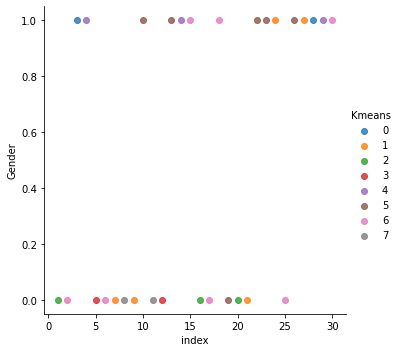

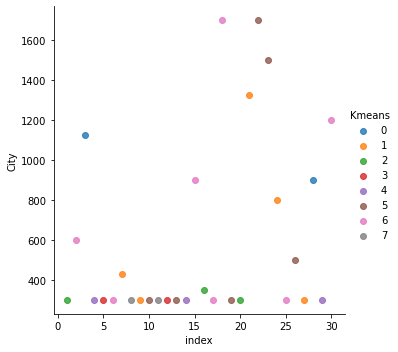

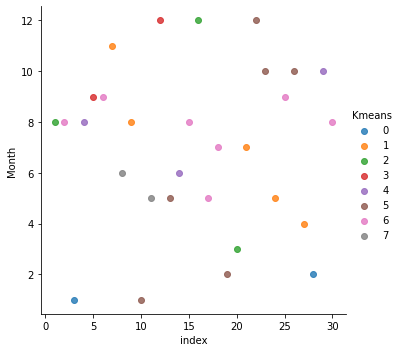

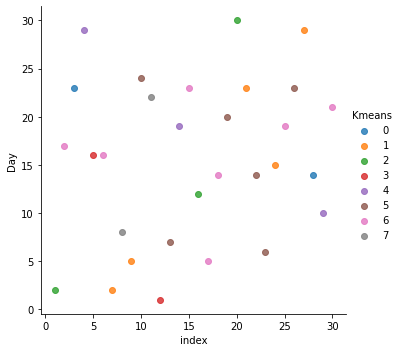

In [28]:
sns.lmplot(x='index' , y='Gender', data=main_data_frame, hue="Kmeans", fit_reg=False)
sns.lmplot(x='index' , y='City', data=main_data_frame, hue="Kmeans", fit_reg=False)
sns.lmplot(x='index' , y='Month', data=main_data_frame, hue="Kmeans", fit_reg=False)
sns.lmplot(x='index' , y='Day', data=main_data_frame, hue="Kmeans", fit_reg=False)

### DBScan plot

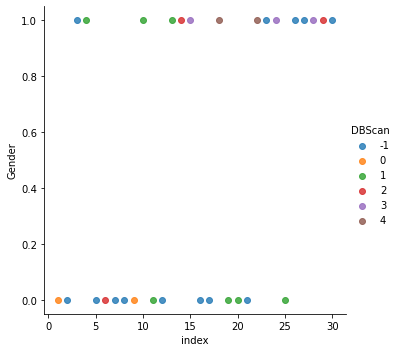

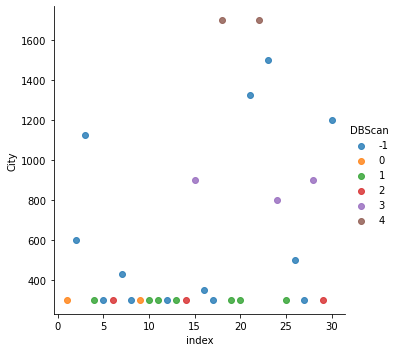

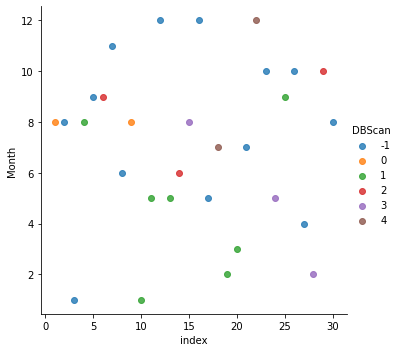

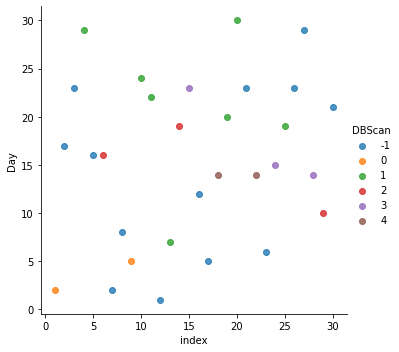

In [30]:
sns.lmplot(x='index' , y='Gender', data=main_data_frame, hue="DBScan", fit_reg=False)
sns.lmplot(x='index' , y='City', data=main_data_frame, hue="DBScan", fit_reg=False)
sns.lmplot(x='index' , y='Month', data=main_data_frame, hue="DBScan", fit_reg=False)
sns.lmplot(x='index' , y='Day', data=main_data_frame, hue="DBScan", fit_reg=False)

### Spectral Bi plot

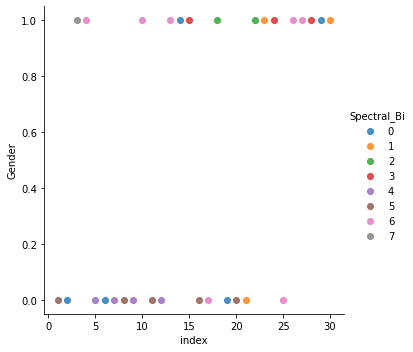

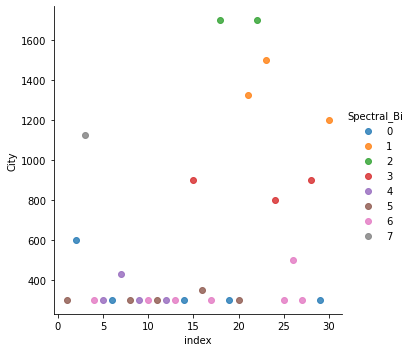

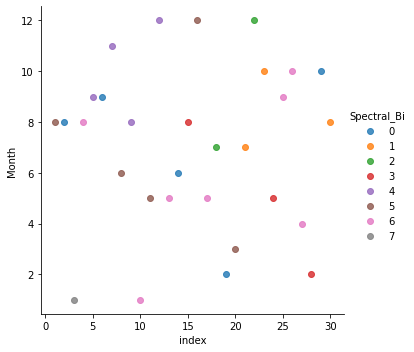

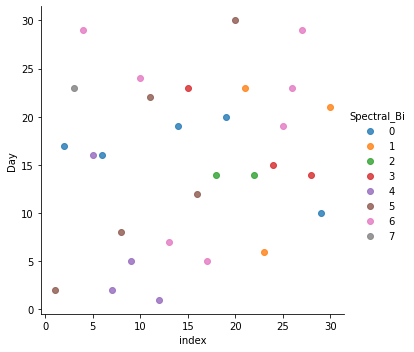

In [31]:
sns.lmplot(x='index' , y='Gender', data=main_data_frame, hue="Spectral_Bi", fit_reg=False)
sns.lmplot(x='index' , y='City', data=main_data_frame, hue="Spectral_Bi", fit_reg=False)
sns.lmplot(x='index' , y='Month', data=main_data_frame, hue="Spectral_Bi", fit_reg=False)
sns.lmplot(x='index' , y='Day', data=main_data_frame, hue="Spectral_Bi", fit_reg=False)

## THANK FOR USING MY NOTEBOOK